In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
img = cv2.imread("images/russian_car_plate.jpg")

In [12]:
def display(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

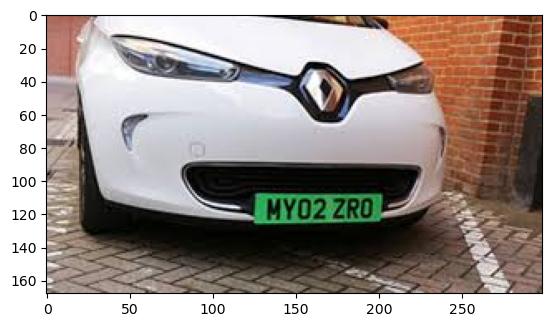

In [13]:
display(img)

In [14]:
plate_cascade = cv2.CascadeClassifier("trained_models/haarcascade_russian_plate_number.xml")

In [35]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors=5)

    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w, x+h), (255,255,255), 5)

    return plate_img

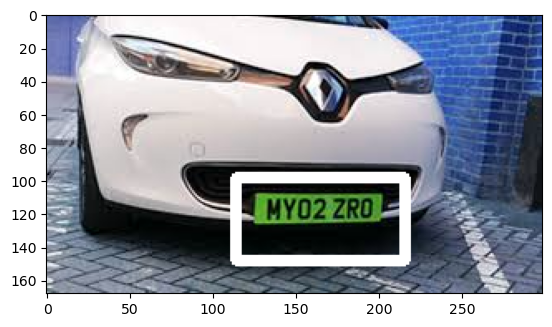

In [36]:
result = detect_plate(img)
plt.imshow(result, cmap="gray")

In [43]:
# Blurring the plate
def detect_and_blur_plate(img):
    plate_img = img.copy()
    k_size = (30, 30) # kernel
    blurred_img = cv2.GaussianBlur(img, (21,21), 0)

    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors=5)

    for (x,y,w,h) in plate_rects:
        mask = cv2.rectangle(plate_img, (x,y), (x+w, x+h), (255,255,255), -1)
        plate_img = np.where(mask==(255,255,255), blurred_img, img)


    return plate_img

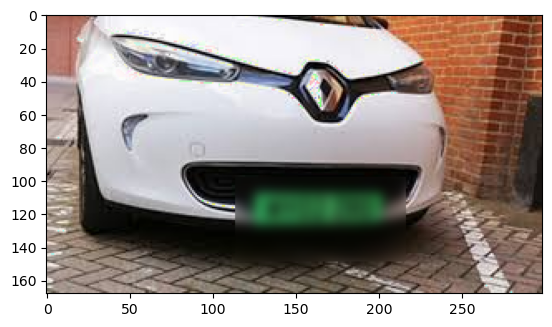

In [44]:
blurred_result = detect_and_blur_plate(img)
display(blurred_result)